# Predicting Recidivism with Machine Learning

## Importing Data

### Import Statements

In [1]:
import numpy as np
import pandas as pd

### Loading Data

In [7]:
"Import data"
# Whole data set for data-exploration
whole_dataframe = pd.read_csv("data/broward_data.csv")
# Test train split used in XYZ paper for training our models. 
train_dataframe = pd.read_csv("data/broward_train.csv")
test_dataframe = pd.read_csv("data/broward_test.csv")

## Exploratory Data Analysis

### Import Statements

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [14]:
whole_dataframe.dtypes

person_id                 int64
screening_date           object
sex                       int64
race                     object
age_at_current_charge     int64
age_at_first_charge       int64
p_charges                 int64
p_incarceration           int64
p_probation               int64
p_juv_fel_count           int64
p_felprop_viol            int64
p_murder                  int64
p_felassault              int64
p_misdeassault            int64
p_famviol                 int64
p_sex_offense             int64
p_weapon                  int64
p_fta_two_year            int64
p_fta_two_year_plus       int64
current_violence          int64
current_violence20        int64
p_pending_charge          int64
p_felony                  int64
p_misdemeanor             int64
p_violence                int64
total_convictions         int64
p_arrest                  int64
p_property                int64
p_traffic                 int64
p_drug                    int64
p_dui                     int64
p_domest

In [13]:
whole_dataframe.isnull().sum()

person_id                0
screening_date           0
sex                      0
race                     0
age_at_current_charge    0
age_at_first_charge      0
p_charges                0
p_incarceration          0
p_probation              0
p_juv_fel_count          0
p_felprop_viol           0
p_murder                 0
p_felassault             0
p_misdeassault           0
p_famviol                0
p_sex_offense            0
p_weapon                 0
p_fta_two_year           0
p_fta_two_year_plus      0
current_violence         0
current_violence20       0
p_pending_charge         0
p_felony                 0
p_misdemeanor            0
p_violence               0
total_convictions        0
p_arrest                 0
p_property               0
p_traffic                0
p_drug                   0
p_dui                    0
p_domestic               0
p_stalking               0
p_voyeurism              0
p_fraud                  0
p_stealing               0
p_trespass               0
s

In [11]:
whole_dataframe.describe()

,person_id,sex,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,p_felprop_viol,p_murder,...,drug_two_year,property_two_year,misdemeanor_two_year,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,3260.150461,0.871546,31.971853,23.956499,11.228762,0.351586,0.967247,0.112590,0.996929,0.017400,...,0.093142,0.089560,0.272262,0.176049,0.209826,0.039918,0.050154,0.125384,0.089048,0.084442
std,1900.758354,0.334681,11.008898,8.868941,11.223027,0.477588,1.481047,0.708095,2.217787,0.174411,...,0.290706,0.285623,0.445238,0.380959,0.407289,0.195817,0.218318,0.331238,0.284886,0.278121
min,4.000000,0.000000,18.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1576.250000,1.000000,23.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3291.000000,1.000000,29.000000,20.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4952.500000,1.000000,39.000000,27.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6468.000000,1.000000,69.000000,60.000000,218.000000,1.000000,16.000000,14.000000,29.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
whole_dataframe.columns

Index(['person_id', 'screening_date', 'sex', 'race', 'age_at_current_charge',
       'age_at_first_charge', 'p_charges', 'p_incarceration', 'p_probation',
       'p_juv_fel_count', 'p_felprop_viol', 'p_murder', 'p_felassault',
       'p_misdeassault', 'p_famviol', 'p_sex_offense', 'p_weapon',
       'p_fta_two_year', 'p_fta_two_year_plus', 'current_violence',
       'current_violence20', 'p_pending_charge', 'p_felony', 'p_misdemeanor',
       'p_violence', 'total_convictions', 'p_arrest', 'p_property',
       'p_traffic', 'p_drug', 'p_dui', 'p_domestic', 'p_stalking',
       'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass', 'six_month',
       'one_year', 'three_year', 'five_year', 'general_two_year',
       'general_six_month', 'drug_two_year', 'property_two_year',
       'misdemeanor_two_year', 'felony_two_year', 'violent_two_year',
       'drug_six_month', 'property_six_month', 'misdemeanor_six_month',
       'felony_six_month', 'violent_six_month'],
      dtype='object')

ValueError: num must be 1 <= num <= 15, not 16

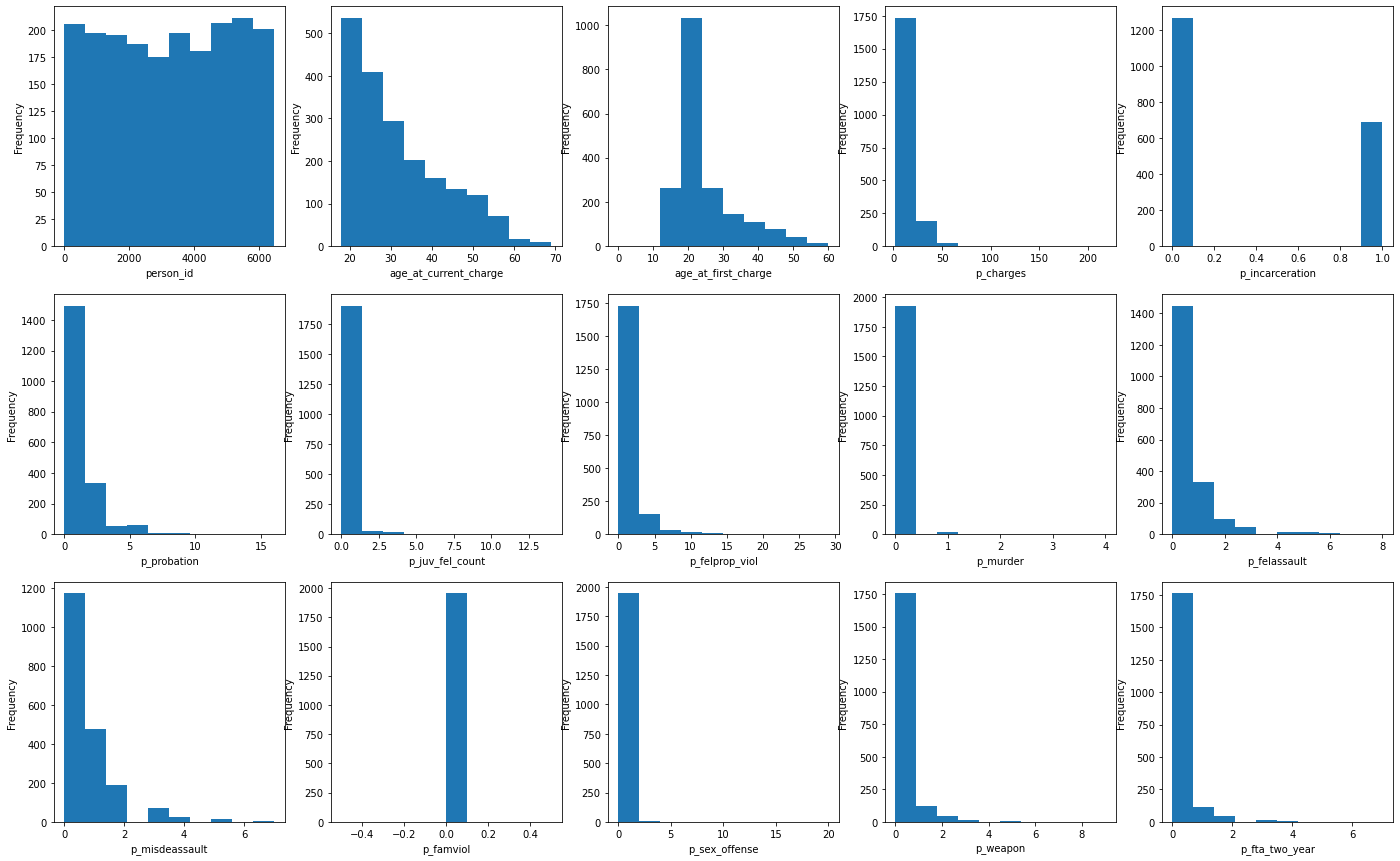

In [19]:
fig = plt.figure(figsize=(24, 15))
i = 0
numerical_columns = ['person_id', 'age_at_current_charge',
       'age_at_first_charge', 'p_charges', 'p_incarceration', 'p_probation',
       'p_juv_fel_count', 'p_felprop_viol', 'p_murder', 'p_felassault',
       'p_misdeassault', 'p_famviol', 'p_sex_offense', 'p_weapon',
       'p_fta_two_year', 'p_fta_two_year_plus', 'current_violence',
       'current_violence20', 'p_pending_charge', 'p_felony', 'p_misdemeanor',
       'p_violence', 'total_convictions', 'p_arrest', 'p_property',
       'p_traffic', 'p_drug', 'p_dui', 'p_domestic', 'p_stalking',
       'p_voyeurism', 'p_fraud', 'p_stealing', 'p_trespass']
for column in numerical_columns:
    sub = fig.add_subplot(3, 5, i+1)
    sub.set_xlabel(column)
    whole_dataframe[column].plot(kind = 'hist')
    i = i + 1